# multiple images

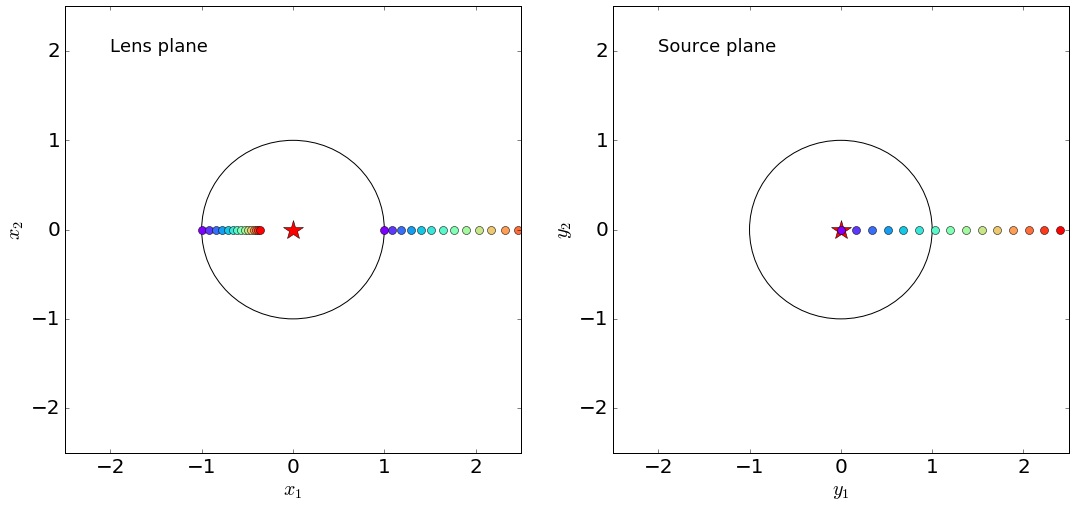

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm 

%matplotlib inline

M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=1.0
t0=365.0 # days

fig,ax=plt.subplots(1,2,figsize=(18,8))
circle=plt.Circle((0,0),1,color='black',fill=False)
circle_y=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-2.5,2.5])
ax[0].set_ylim([-2.5,2.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

ax[1].set_xlim([-2.5,2.5])
ax[1].set_ylim([-2.5,2.5])
ax[1].add_artist(circle_y)
ax[1].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

y0=np.linspace(0,2.4,15)
y1=np.zeros(15)

x1_0=0.5*(y0+np.sqrt(y0*y0+4))
x1_1=np.zeros(15)

x2_0=0.5*(y0-np.sqrt(y0*y0+4))
x2_1=np.zeros(15)

color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    ax[0].plot([x1_0[i]],[x1_1[i]],'o',markersize=8,color=c)
    ax[0].plot([x2_0[i]],[x2_1[i]],'o',markersize=8,color=c)
    ax[1].plot([y0[i]],[y1[i]],'o',markersize=8,color=c)
    
ax[0].text(-2,2,'Lens plane',fontsize=18)
ax[1].text(-2,2,'Source plane',fontsize=18)

ax[0].set_xlabel(r'$x_1$',fontsize=20)
ax[0].set_ylabel(r'$x_2$',fontsize=20)
ax[1].set_xlabel(r'$y_1$',fontsize=20)
ax[1].set_ylabel(r'$y_2$',fontsize=20)

fig.savefig('pmle.png')

# magnification ratio 

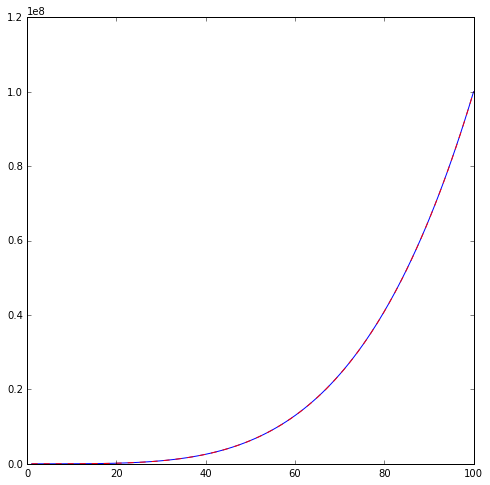

In [3]:
y=np.linspace(1,100,100)
mur=(y+np.sqrt(y**2+4))**2/(y-np.sqrt(y**2+4))**2
mulim=y**4

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.plot(y,mur,'-')
ax.plot(y,mulim,'--',color='red')

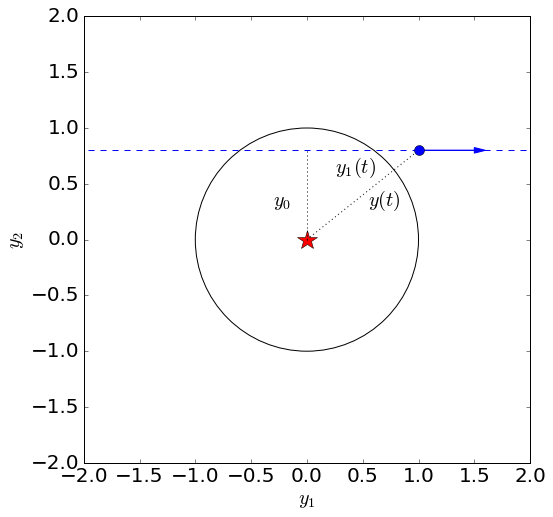

In [23]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
circle=plt.Circle((0,0),1,color='black',fill=False)
ax.set_xlim([-2.,2.])
ax.set_ylim([-2.,2.])
ax.add_artist(circle)
ax.plot([0.0],[0.0],'*',markersize=20,color='red')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

y2=[0.8,0.8]
y1=[-2.5,2.5]

ax.plot(y1,y2,'--')

x1=[0,0]
x2=[0,0.8]

ax.plot(x1,x2,':',color='black')
ax.text(-0.3,0.3,r'$y_0$',fontsize=20) 

x1=[0,1]
x2=[0,0.8]
ax.plot(x1,x2,':',color='black')
ax.plot([1],[0.8],'o',markersize=10,color='blue')
ax.text(0.55,0.3,r'$y(t)$',fontsize=20)
ax.text(0.25,0.6,r'$y_1(t)$',fontsize=20)
ax.arrow(1, 0.8, 0.5, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue',color='blue')
    
#ax[0].text(-2,2,'Lens plane',fontsize=18)
#ax[1].text(-2,2,'Source plane',fontsize=18)

ax.set_xlabel(r'$y_1$',fontsize=20)
ax.set_ylabel(r'$y_2$',fontsize=20)

fig.savefig('micro_motion.png')

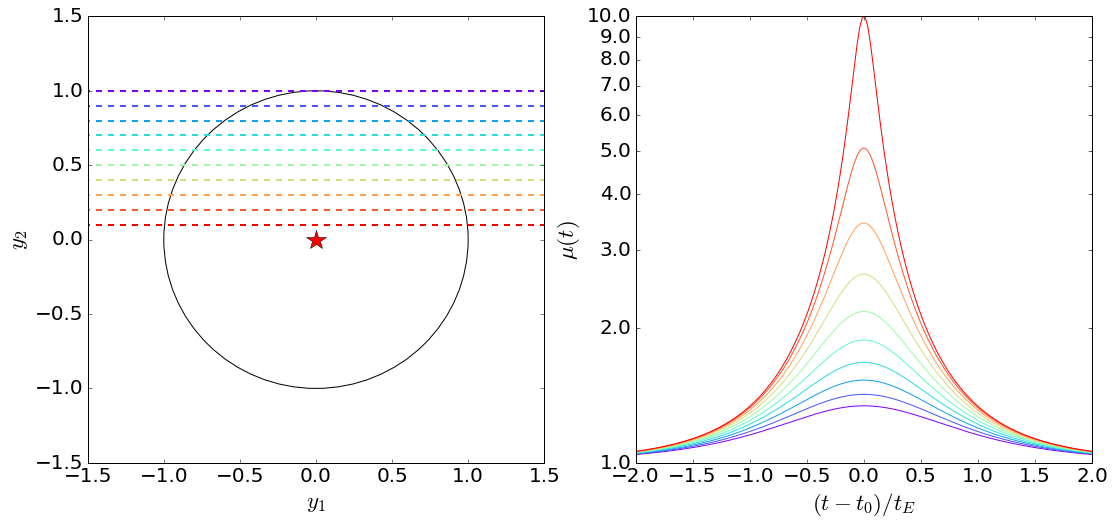

In [25]:
# import the usual stuff

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

%matplotlib inline

# our problem can be phrased as this: given a lens with a given mass M and placed 
# at a given distance D_L, we want to compute the magnification of a source moving a velocity 
# v on a plane at distance D_S, knowing that the source passes at a minimal distance y0 from
# the lens at the time t0. 

def mut_func(M,DL,DS,v,y0,t0,t):
    y=yt(M,DL,DS,v,y0,t0,t)
    return ((y**2+2)/y/np.sqrt(y**2+4))

def yt(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return (np.sqrt(y0**2+((t-t0)/tE)**2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)


t=np.linspace(0,730,1600)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=1.0
t0=365.0 # days

xx=[-2,2]
mut=mut_func(M_lens,DL,DS,vel,y0,t0,t)

theta_einst=theta_e_func(M_lens,DL,DS)
t_einst=EinsteinCrossTime(M_lens,DL,DS,vel)

y0=np.linspace(1.0,0.1,10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[1].set_ylim([1.0,10.0])
ax[1].set_xlim([-2,2])
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$(t-t_0)/t_E$',fontsize=23)
ax[1].set_ylabel(r'$\mu(t)$',fontsize=23)
ax[1].set_yticks(np.arange(1, 11, 1.0))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

from matplotlib.pyplot import cm 
color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    mut=mut_func(M_lens,DL,DS,vel,y0[i],t0,t)
    ax[1].plot((t-t0)/t_einst,mut,'-',color=c)
    yy=[y0[i],y0[i]]
    ax[0].plot(xx,yy,'--',color=c,lw=2)

ax[0].set_xlabel(r'$y_1$',fontsize=23) 
ax[0].set_ylabel(r'$y_2$',fontsize=23)

fig.savefig('micro_lightcurves.png')

# Finite source-size effects

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


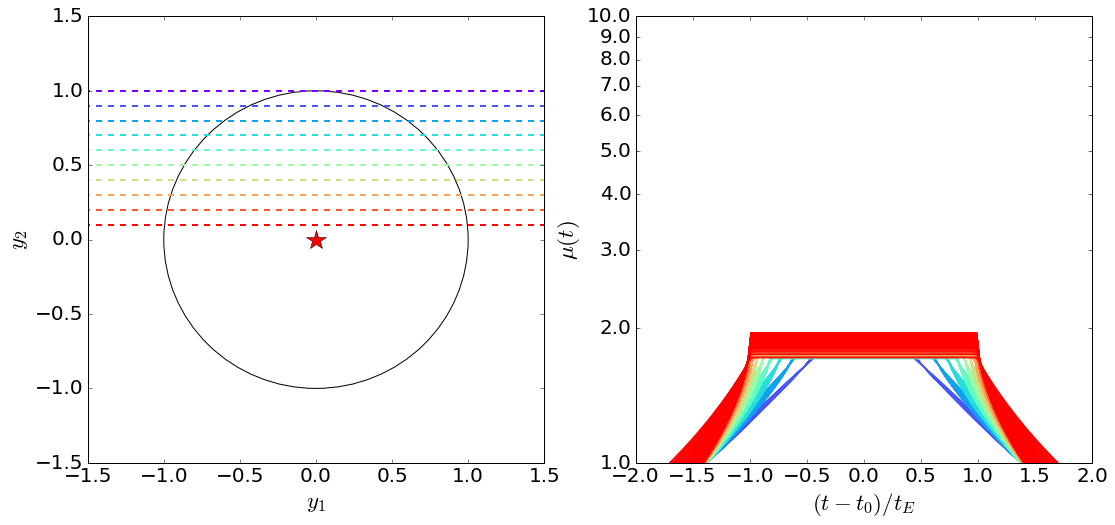

In [116]:
# import the usual stuff

import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as ticker

%matplotlib inline

# our problem can be phrased as this: given a lens with a given mass M and placed 
# at a given distance D_L, we want to compute the magnification of a source moving a velocity 
# v on a plane at distance D_S, knowing that the source passes at a minimal distance y0 from
# the lens at the time t0. 

def mut_func_FSS(M,DL,DS,v,y0,t0,t,rho):
    from scipy.special import ellipeinc 
    y=yt(M,DL,DS,v,y0,t0,t)
    mut=[]
    for i in range(y.size):
        tm=theta_max(y[i],rho)
        mut.append(((y**2+2)/y/np.sqrt(y**2+4))*4.0*y/np.pi/rho*ellipeinc(tm,y/rho))
    mut=np.array(mut)
    return mut

def theta_max(y,rho):
    if y<=rho:
        return np.pi/2
    else:
        return np.arcsin(rho/y)

def mut_func(M,DL,DS,v,y0,t0,t):
    y=yt(M,DL,DS,v,y0,t0,t)
    return ((y**2+2)/y/np.sqrt(y**2+4))

def yt(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return (np.sqrt(y0**2+((t-t0)/tE)**2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)


t=np.linspace(0,730,1600)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=200 # km/s
y0=1.0
t0=365.0 # days
rho=1.0

xx=[-2,2]
mut=mut_func_FSS(M_lens,DL,DS,vel,y0,t0,t,rho)
print mut

theta_einst=theta_e_func(M_lens,DL,DS)
t_einst=EinsteinCrossTime(M_lens,DL,DS,vel)

y0=np.linspace(1.0,0.1,10)

fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[1].set_ylim([1.0,10.0])
ax[1].set_xlim([-2,2])
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$(t-t_0)/t_E$',fontsize=23)
ax[1].set_ylabel(r'$\mu(t)$',fontsize=23)
ax[1].set_yticks(np.arange(1, 11, 1.0))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)

circle=plt.Circle((0,0),1,color='black',fill=False)
ax[0].set_xlim([-1.5,1.5])
ax[0].set_ylim([-1.5,1.5])
ax[0].add_artist(circle)
ax[0].plot([0.0],[0.0],'*',markersize=20,color='red')
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)

from matplotlib.pyplot import cm 
color=iter(cm.rainbow(np.linspace(0,1,y0.size)))

for i in range(y0.size):
    c=next(color)
    mut=mut_func_FSS(M_lens,DL,DS,vel,y0[i],t0,t,rho)
    ax[1].plot((t-t0)/t_einst,mut,'-',color=c)
    yy=[y0[i],y0[i]]
    ax[0].plot(xx,yy,'--',color=c,lw=2)

ax[0].set_xlabel(r'$y_1$',fontsize=23) 
ax[0].set_ylabel(r'$y_2$',fontsize=23)

fig.savefig('micro_lightcurves.png')

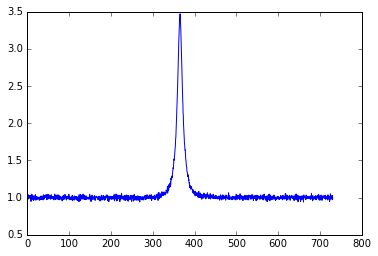

In [93]:
import numpy as np
import lmfit

np.random.seed(0)

def mut_func(M,DL,DS,v,y0,t0,t):
    y=yt(M,DL,DS,v,y0,t0,t)
    return ((y**2+2)/y/np.sqrt(y**2+4))

def yt(M,DL,DS,v,y0,t0,t):
    tE=EinsteinCrossTime(M,DL,DS,v).value
    return (np.sqrt(y0**2+((t-t0)/tE)**2))

def EinsteinCrossTime(M,DL,DS,v):
    theta_e=theta_e_func(M,DL,DS)
    return(((theta_e.to('radian').value*DL*u.kpc).to('km')/v/u.km*u.s).to('day'))

def theta_e_func(M,DL,DS):
    mass=M*const.M_sun#.value
    G=const.G#.value
    c=c=const.c#.value
    aconv=180.0*3600.0/np.pi*u.arcsecond
    return((np.sqrt(4.0*(G*mass/c/c).to('kpc')*(DS-DL)/DL/DS/u.kpc))*aconv)

# input light-curve
t=np.linspace(0,730,1600)
M_lens=0.3 # solar masses
DL=4.0 # kpc
DS=8.0 # kpc
vel=210 # km/s
y0=0.3
t0=365.0 # days

mut=mut_func(M_lens,DL,DS,vel,y0,t0,t)+(np.random.randn(len(t))*0.02)
plt.plot(t, mut)

[[Variables]]
    t0:       365.019975 (init= 360)
    M_lens:   0.22130718 (init= 0.5)
    DL:       5.23740866 (init= 5)
    DS:       9.98562749 (init= 10)
    vel:      201.436139 (init= 200)
    y0:       0.30006581 (init= 0.2)
[[Correlations]] (unreported correlations are <  0.500)


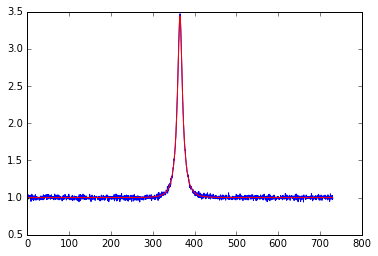

In [94]:
p = lmfit.Parameters()
p.add_many(('t0', 360.,True,0,720), ('M_lens', 0.5, True, 0.001, 100.0), ('DL', 5., True, 0.1, 10.), 
           ('DS', 10., True, 5., 15.), ('vel',200,True,100.,300.), ('y0',0.2, True, 0.01,1.0))
 
def residual(p):
    from numpy import inf
    v = p.valuesdict()
    res=mut_func(v['M_lens'],v['DL'],v['DS'],v['vel'],v['y0'],v['t0'],t)-mut
    res[res == inf] = 2e200
    return(res)

mi = lmfit.minimize(residual, p, method='Nelder')
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
plt.plot(t, mut)
plt.plot(t, residual(mi.params) + mut, 'r')

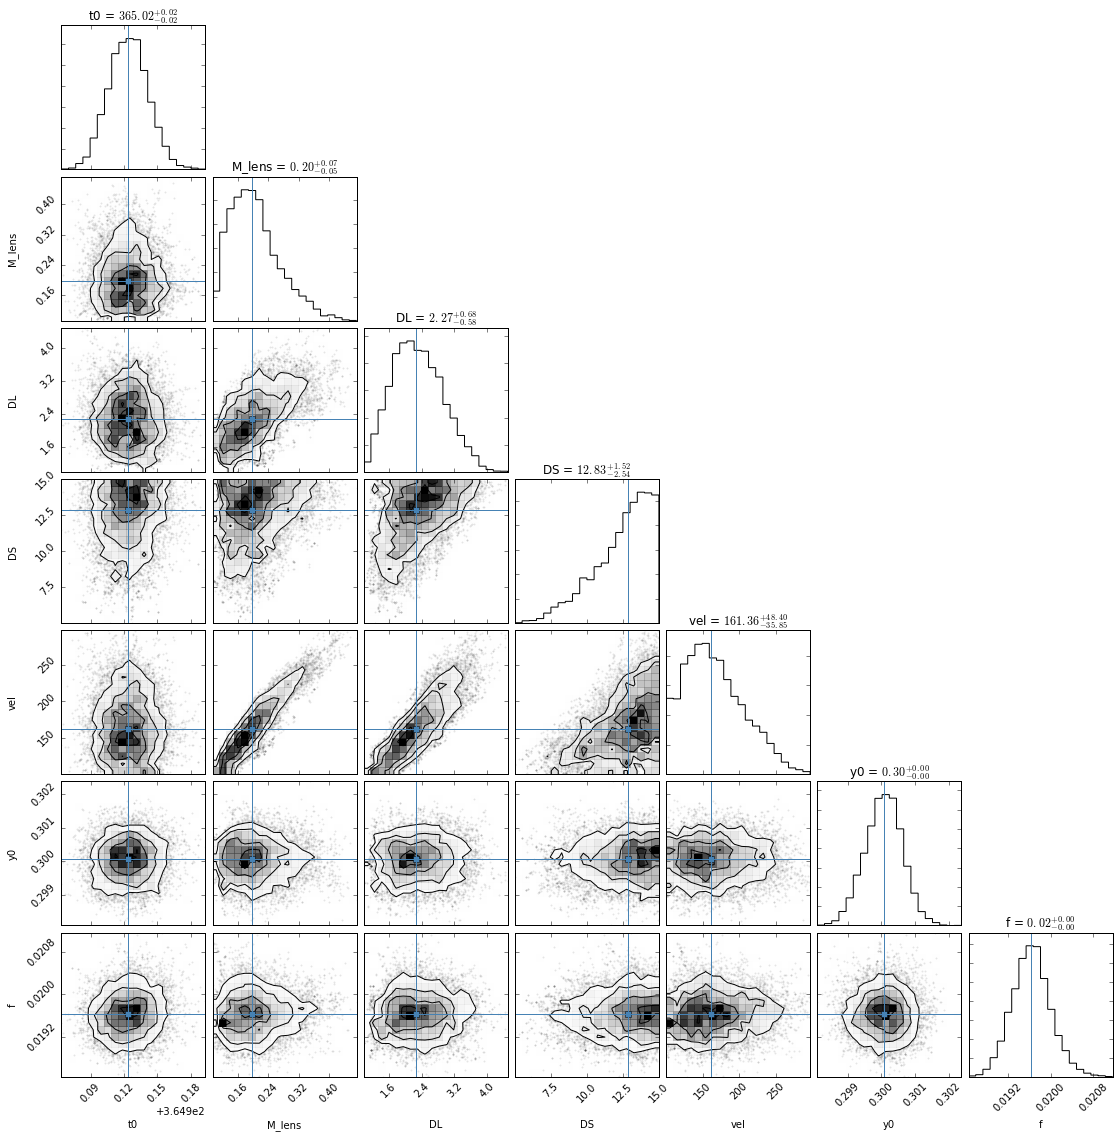

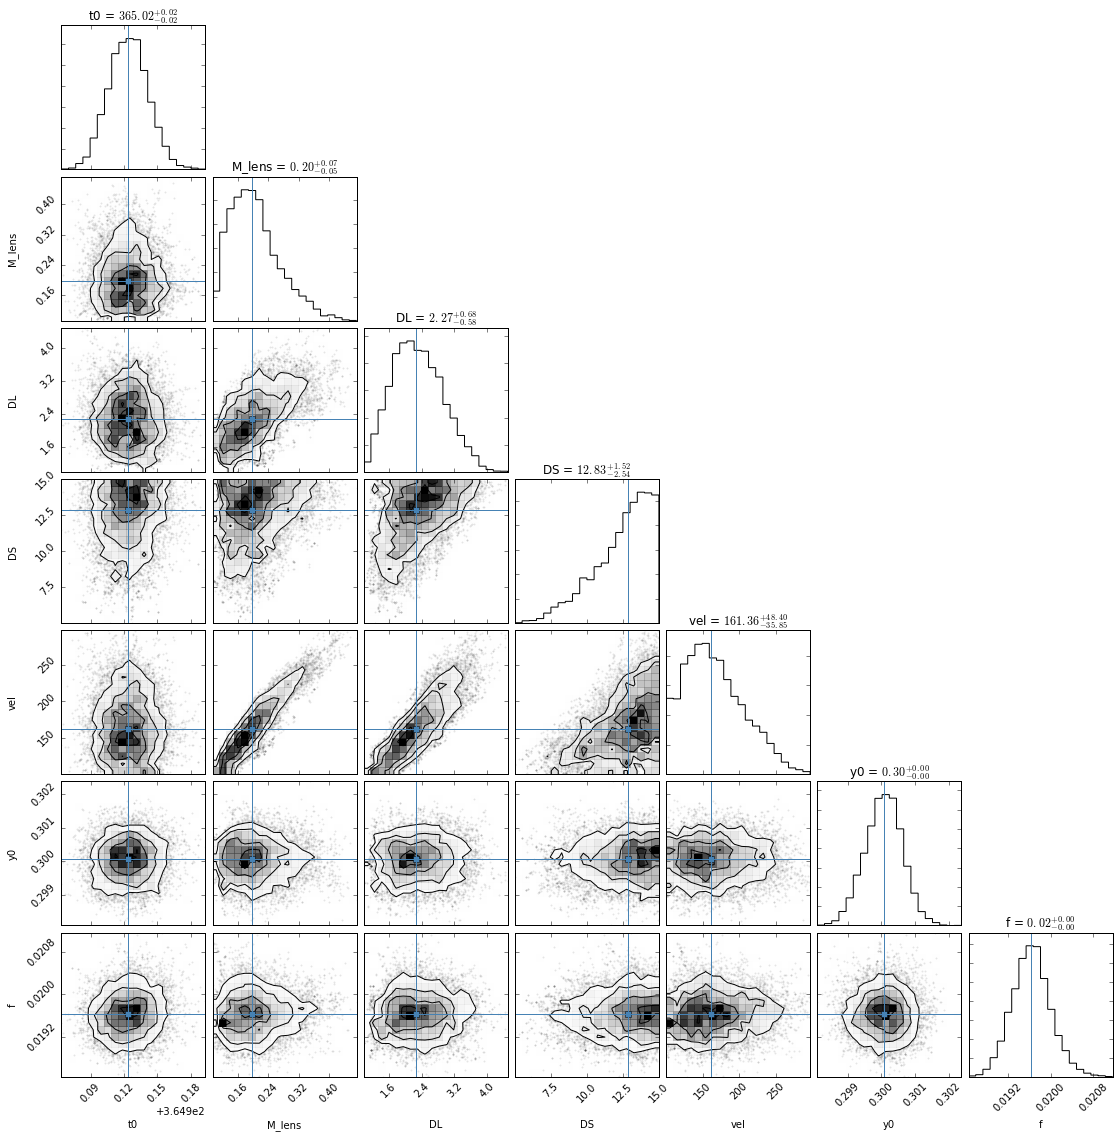

In [99]:
mi.params.add('f', value=0.1, min=0.001, max=2)
def lnprob(p):
    from numpy import inf
    resid = residual(p)
    s = p['f']
    resid *= 1 / s
    resid *= resid
    resid += np.log(2 * np.pi * s**2)
    lnp=-0.5 * np.sum(resid)
    if (np.isnan(lnp)):
        lnp=-1e10
    
    return lnp

mini = lmfit.Minimizer(lnprob, mi.params, nan_policy='propagate')
res = mini.emcee(burn=300, steps=1200, thin=10, params=mi.params)

import corner
corner.corner(res.flatchain, labels=res.var_names, truths=list(res.params.valuesdict().values()),show_titles=True, title_kwargs={"fontsize": 12})

In [100]:
print("median of posterior probability distribution")
print('------------------------------------------')
lmfit.report_fit(res.params)

median of posterior probability distribution
------------------------------------------
[[Variables]]
    t0:       365.023838 +/- 0.017461 (0.00%) (init= 365.02)
    M_lens:   0.19672600 +/- 0.064780 (32.93%) (init= 0.2213072)
    DL:       2.26993204 +/- 0.630850 (27.79%) (init= 5.237409)
    DS:       12.8292280 +/- 2.039942 (15.90%) (init= 9.985627)
    vel:      161.356985 +/- 42.32419 (26.23%) (init= 201.4361)
    y0:       0.30008558 +/- 0.000549 (0.18%) (init= 0.3000658)
    f:        0.01963365 +/- 0.000355 (1.81%) (init= 0.1)
[[Correlations]] (unreported correlations are <  0.100)
    C(M_lens, vel)               =  0.925 
    C(DL, vel)                   =  0.849 
    C(M_lens, DL)                =  0.598 
    C(DL, DS)                    =  0.454 
    C(DS, vel)                   =  0.423 
    C(M_lens, DS)                =  0.232 
    C(t0, f)                     =  0.108 
